# Walmart Data Analysis and Forecasting Sales

Walmart is one of the largest retail companies in the world. The company was founded by `Sam Walton` in `1962` in `Bentonville, Arkansas, United States of America`. `Walmart` originally operated as a one-stop shop offering a wide range of products at competitive prices.

We have a `weekly sales` dataset from `Walmart`. The data contains, among others:
- `Weekly sales` report in USD.
- `Store codes` contains Walmart branch stores with special codes.
- `Temperature` in degrees Celsius.
- `Holiday` indicating whether it is `holiday` or `not holiday`.
- `CPI` which is the consumer price index
- `Fuel price` which is the price of fuel.
- `Unemployment rate`which is the rate of unemployment.

We will analyze to get `insight` from the dataset and do `machine learning` modeling to predict future sales `future`. Some of the goals and formulation of the problem include:
1. What is the `trend` of `weekly sales` from the range of available datasets?
2. How do `holiday`, `temperature`, `CPI`, `fuel price`, and `unemployment rate` affect `weekly sales`?
3. How is the performance of each store (`store code`)?
4. Knowing the `hybrid machine learning model` of `linear regression` and `XGBoost` can predict the `forecasting` of `Walmart` sales.

# Content

- Introduction
- Content
- Pre-processing Data
    - Initialization
    - Load the Dataset
    - Repairing Dataset
    - Checking for Missing Values
    - Checking for Data Duplication
- Exploratory Data Analysis (EDA)
    - Weekly Sales Report
    - Sales Performance Based on Holiday
    - Weekly Sales Relation To Temperature
    - Weekly Sales Relation to Fuel Price
    - Weekly Sales Relation To CPI
    - Weekly Sales Relationship Against Unemployment Rate
    - Sales Performance Based on Store Code
    - Correlation Table
- Sales Forecast Using Machine Learning
    - Recreate Sales History Chart
        - Create Weekly Sales Chart
        - Create Monthly Sales Chart
    - Machine Learning for Time Series
        - Weekly Sales Forecasting
            - Linear Regression for Trend Analysis
            - Predict Residual Using XGBoost
            - Calculate Score for MAE, RMSE and R2 Score
        - Monthly Sales Forecasting
            - Linear Regression for Trend Analysis
            - Predict Residual Using XGBoost
            - Calculate Score for MAE, RMSE and R2 Score
- General Conclusion

# Pre-processing Data

## Initialization

In [1]:
# load all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.express as px

# set seaborn theme
sns.set_theme(palette='bright')

## Load the Dataset

In [2]:
# load the dataset
df = pd.read_csv('Walmart Data Analysis and Forcasting.csv')

In [3]:
# check the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# check the sample dataset
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05/02/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/02/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19/02/2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26/02/2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05/03/2010,1554806.68,0,46.50,2.625,211.350143,8.106


There are `6435 rows` and `8 columns` in our dataset. There are several wrong data types and poor quality such as:
- Column names that still use capital letters at the beginning of the word.
- Incorrect date data type.
- Column `weekly sales` which needs to be simplified.
- The `store` field should be changed to `category` type.

## Repairing Dataset

In [5]:
# convert `Date` column from object data type to datetime type
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

# convert `Weekly_Sales` column from USD to millions of USD
df['Weekly_Sales'] = df['Weekly_Sales'].div(1000000)

# change all column names to lowercase
df.columns = df.columns.str.lower()

# convert `store` column to category type
df['store'] = df['store'].astype('category')

## Checking for Missing Values

In [6]:
# check for missing values
df.isna().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

There are no `missing values` in all the columns in the dataset.

## Checking for Data Duplication

In [7]:
# check for duplicated data
df.duplicated().sum()

0

There is no `duplication` in our dataset.

In [8]:
# final check the information of dataset
print(df.info())

# check the sample dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   category      
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 359.7 KB
None


,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-02-05,1.643691,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1.641957,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1.611968,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1.409728,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1.554807,0,46.50,2.625,211.350143,8.106


The information above shows that the dataset is as expected.

# Exploratory Data Analysis (EDA)

In [9]:
# chek summary dataset
df.select_dtypes(exclude=['category','datetime64[ns]']).describe()

,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965,0.069930,60.663782,3.358607,171.578394,7.999151
std,0.564367,0.255049,18.444933,0.459020,39.356712,1.875885
min,0.209986,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,0.553350,0.000000,47.460000,2.933000,131.735000,6.891000
50%,0.960746,0.000000,62.670000,3.445000,182.616521,7.874000
75%,1.420159,0.000000,74.940000,3.735000,212.743293,8.622000
max,3.818686,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
# check start and end of date in dataset
print('Start date -->',df['date'].min())
print('End date   -->',df['date'].max())

Start date --> 2010-02-05 00:00:00
End date   --> 2012-10-26 00:00:00


Insights:
- The dataset does not show any `outlier` in any `numeric` column.
- Date starts on `5 February 2010`.
- End date on `26 October 2012`.

## Weekly Sales Report

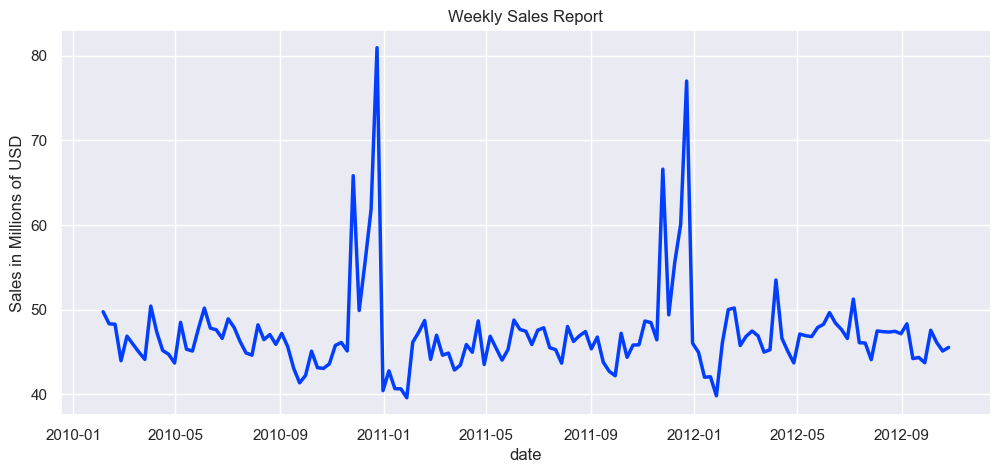

In [11]:
# create group by weekly sales
weekly = df.groupby('date')['weekly_sales'].sum().to_frame().reset_index()

# create weekly_sales plot
plt.figure(figsize=(12,5))
sns.lineplot(x=weekly['date'], y=weekly['weekly_sales'], linewidth=2.5)
plt.title('Weekly Sales Report')
plt.ylabel('Sales in Millions of USD')

# show the chart
plt.show()

The graph above shows that the sales cycle repeats regularly, then when approaching the end of the year it shows a significant spike in sales until the end of the year. The highest total sales for the period `2010 to 2012` occurred at the end of `2010` where sales exceeded `80 Million USD`.

## Sales Performance Based on Holiday

In [12]:
# create a copy from dataset
holiday = df.copy()

# add year coloumn in dataset
holiday['year'] = holiday['date'].dt.year
holiday['year'] = holiday['year'].astype('category')
holiday['holiday_flag'] = holiday['holiday_flag'].apply(lambda x: 'Holiday' if x == 1 else 'Not Holiday')

# create group by `holiday_flag` for `weekly_sales`
holiday = holiday.groupby(['year','holiday_flag'])['weekly_sales'].mean().apply(lambda x:round(x,2)).to_frame().reset_index()

# create bar plot
fig_1 = px.bar(
    data_frame=holiday,
    x='holiday_flag', 
    y='weekly_sales', 
    color='year',
    text_auto=True,
    width=700,
    height=500,
    title='Holiday Comparation of Performance in Sales')

# update layout
fig_1.update_layout(
    xaxis=dict(title=None),
    yaxis=dict(title='Average Weekly Sales in Millions of USD')
)

# show the chart
fig_1.show()

It can be seen that almost every year the weekly average sales performance on `Holiday` is higher than the weekly average sales on `Not Holiday`.

## Weekly Sales Relation To Temperature

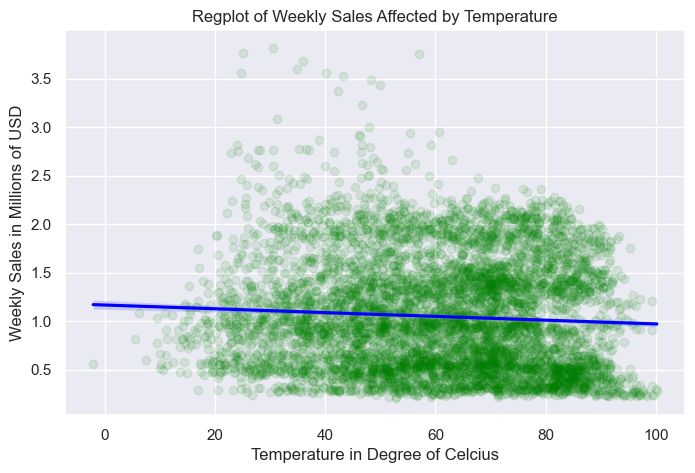

In [13]:
# create plot `temperature` vs `weekly_sales`
plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x='temperature',
    y='weekly_sales',
    line_kws={'color': 'blue'},
    scatter_kws={'color': 'green','alpha': 0.1})
plt.title('Regplot of Weekly Sales Affected by Temperature')
plt.ylabel('Weekly Sales in Millions of USD')
plt.xlabel('Temperature in Degree of Celcius')

# show the chart
plt.show()

It can be seen that there is a slight correlation between `weekly sales` and `temperature` which indicates that the higher the temperature, the lower the weekly sales.

## Weekly Sales Relation to Fuel Price

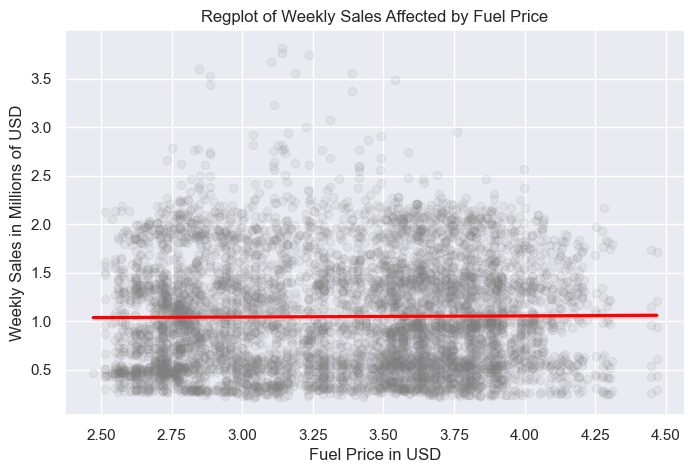

In [14]:
# create plot `fuel price` vs `weekly_sales`
plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x='fuel_price',
    y='weekly_sales',
    line_kws={'color': 'red'},
    scatter_kws={'color': 'gray','alpha': 0.1})
plt.title('Regplot of Weekly Sales Affected by Fuel Price')
plt.ylabel('Weekly Sales in Millions of USD')
plt.xlabel('Fuel Price in USD')

# show the chart
plt.show()

It can be seen that the correlation is weak between `fuel prices` and `weekly sales` and shows that changes in fuel price for the range `2.5 USD` to `4.5 USD` do not affect `weekly sales`.

## Weekly Sales Relation To CPI

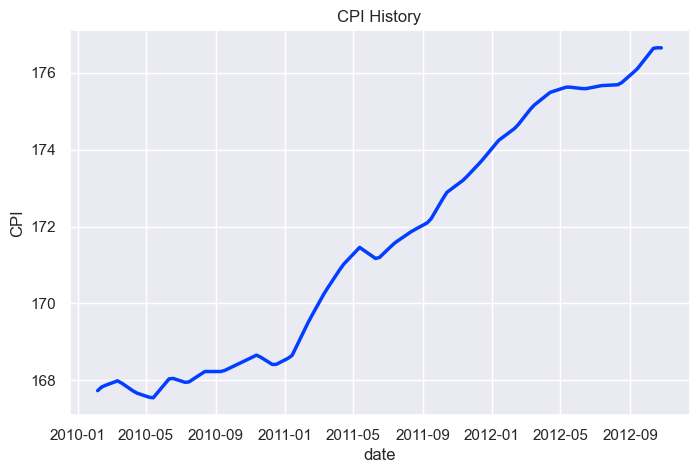

In [15]:
# create group by cpi
cpi = df.groupby('date')['cpi'].mean().to_frame().reset_index()

# create plot for cpi
plt.figure(figsize=(8,5))
sns.lineplot(x=cpi['date'], y=cpi['cpi'], linewidth=2.5)
plt.title('CPI History')
plt.ylabel('CPI')

# show the chart
plt.show()

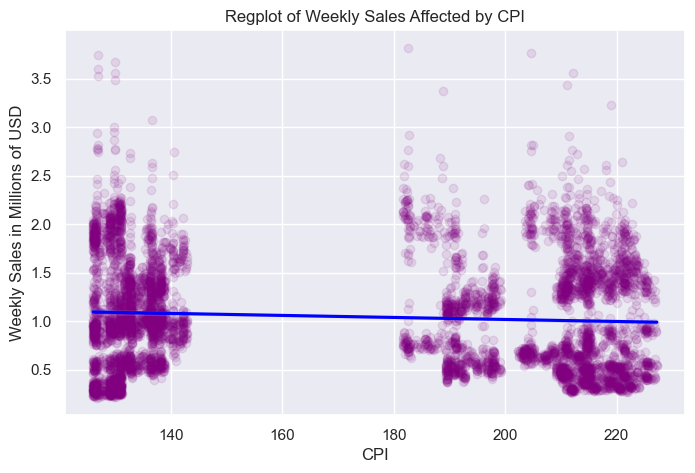

In [16]:
# create plot `CPI` vs `weekly_sales`
plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x='cpi',
    y='weekly_sales',
    line_kws={'color': 'blue'},
    scatter_kws={'color': 'purple','alpha': 0.1})
plt.title('Regplot of Weekly Sales Affected by CPI')
plt.ylabel('Weekly Sales in Millions of USD')
plt.xlabel('CPI')

# show the chart
plt.show()

The `CPI` price shows inflation in a place or country. It can be seen in the first chart that every week there is almost an increase in `CPI` from time to time. While the second chart shows that there is a weak correlation between `CPI` and `weekly sales` and shows a downward trend.

## Weekly Sales Relationship Against Unemployment Rate

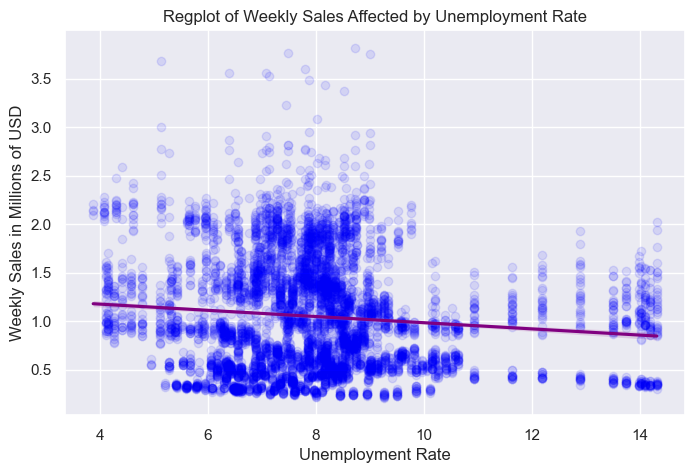

In [17]:
# create plot `CPI` vs `weekly_sales`
plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x='unemployment',
    y='weekly_sales',
    line_kws={'color': 'purple'},
    scatter_kws={'color': 'blue','alpha': 0.1})
plt.title('Regplot of Weekly Sales Affected by Unemployment Rate')
plt.ylabel('Weekly Sales in Millions of USD')
plt.xlabel('Unemployment Rate')

# show the chart
plt.show()

The level of `unemployment rate` shows a weak correlation between `weekly sales` and `unemployment rate` and shows a downward trend.

## Sales Performance Based on Store Code

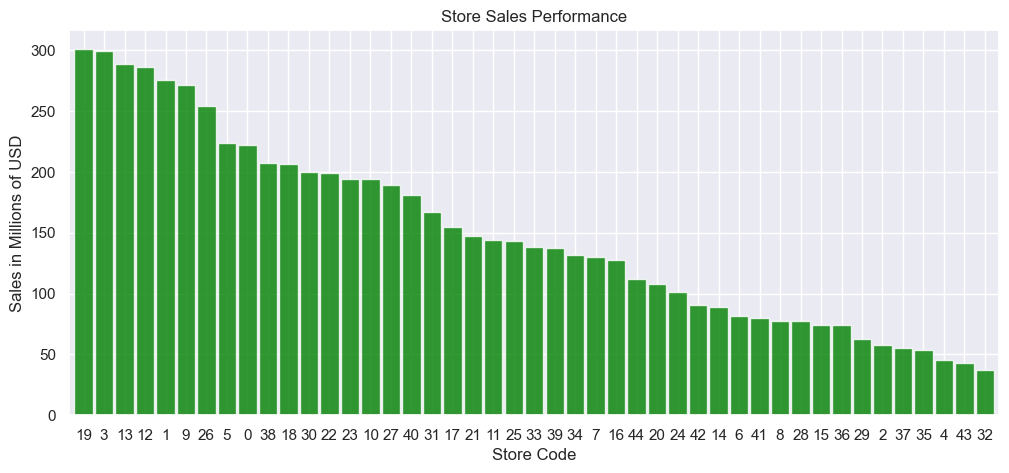

In [18]:
# create group of weekly_sales based on store code
store = df.groupby('store')['weekly_sales'].sum().to_frame().reset_index().sort_values(by='weekly_sales', ascending=False)

# create a barplot for store sales performance
store.plot(kind='bar', width=0.9, figsize=(12,5), rot=0, legend=False, alpha=0.8, color='green')
plt.title('Store Sales Performance')
plt.xlabel('Store Code')
plt.ylabel('Sales in Millions of USD')

# show the chart
plt.show()

Based on the graph above, it can be seen that the three stores with the best sales are occupied by `Shop 19`, `Shop 3` and `Shop 13` while the shops with the lowest sales are occupied by `Shop 4`, `Shop 43` and `Shop 32`.

## Correlation Table

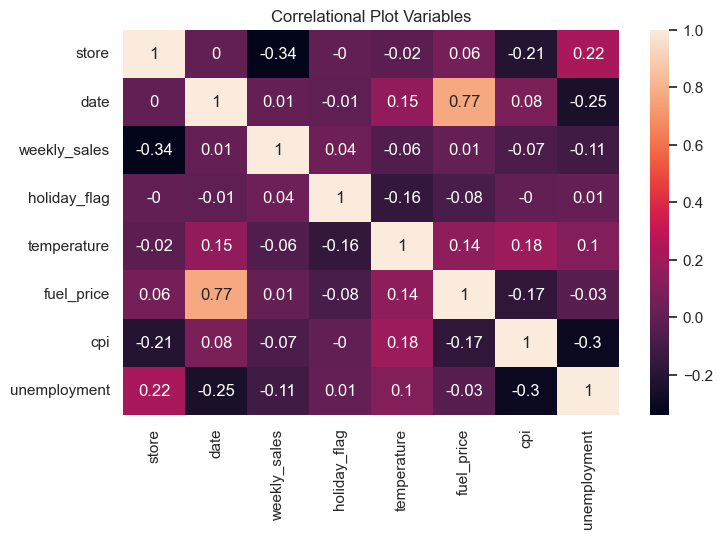

In [19]:
# correlation table plot
df_corr = df.corr().apply(lambda x:round(x,2))
plt.figure(figsize=(8,5))
plt.title('Correlational Plot Variables')
sns.heatmap(df_corr, annot= True)

# show the chart
plt.show()

Based on the correlation chart above, it shows that almost all variables/columns show a weak correlation and no correlation except for a few, such as between `fuel_price` and `date`.

# Sales Forecast Using Machine Learning

## Recreate Sales History Chart

To make it easier to read the sales curve, we will divide it into two parts, namely based on `weekly sales` and `monthly sales` using data aggregation. The dataset that we have is weekly, so we only need to make the monthly one.

### Create Weekly Sales Chart

In [20]:
# copy dataset
weekly_sales = df.copy()

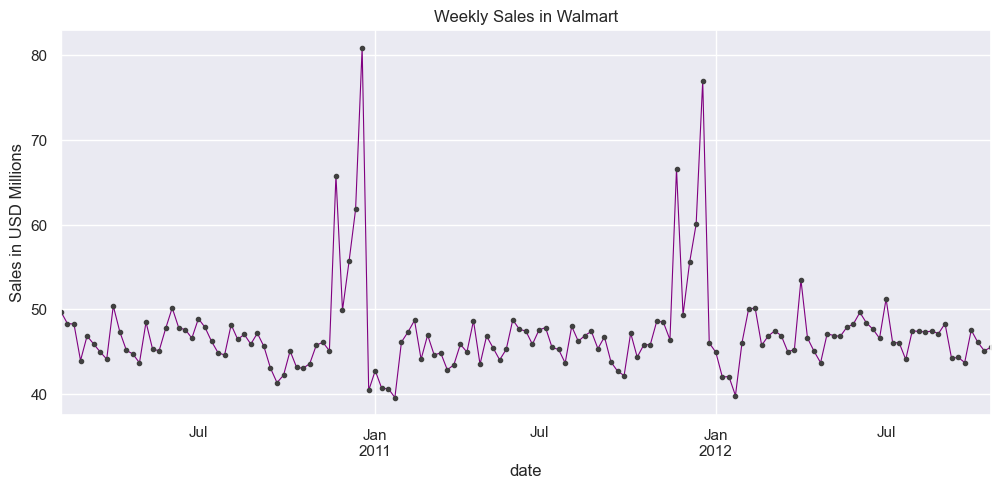

In [21]:
# grouping data based on `date` for `weekly_sales`
weekly_sales = weekly_sales.groupby('date')['weekly_sales'].sum().reset_index()

# create lineplot for `weekly_sales`
weekly_sales.plot(
    style='.-', x='date',
    y='weekly_sales', figsize=(12,5),
    color="purple", alpha=1,
    linewidth=0.8, markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False)

# add the attributes for chart
plt.title('Weekly Sales in Walmart')
plt.ylabel('Sales in USD Millions')
plt.grid(linewidth=1)

# show the chart
plt.show()

The dots describe the value of being, you can see the graph shows a repeating cycle where the average weekly sales go up and down normally but sales boom when approaching the end of the year.

### Create Monthly Sales Chart

In [22]:
# copy dataset
monthly_sales = weekly_sales.copy()

# grouping data based on `date` for `monthly_sales`
monthly_sales['date'] = monthly_sales['date'].dt.to_period('M')
monthly_sales = monthly_sales.groupby('date')['weekly_sales'].sum().sort_index().reset_index()

# rename column to `monthly_sales`
monthly_sales.rename(columns={'weekly_sales':'monthly_sales'},inplace=True)

# show sample datas
monthly_sales.head()

,date,monthly_sales
0,2010-02,190.332983
1,2010-03,181.919803
2,2010-04,231.412368
3,2010-05,186.710934
4,2010-06,192.246172


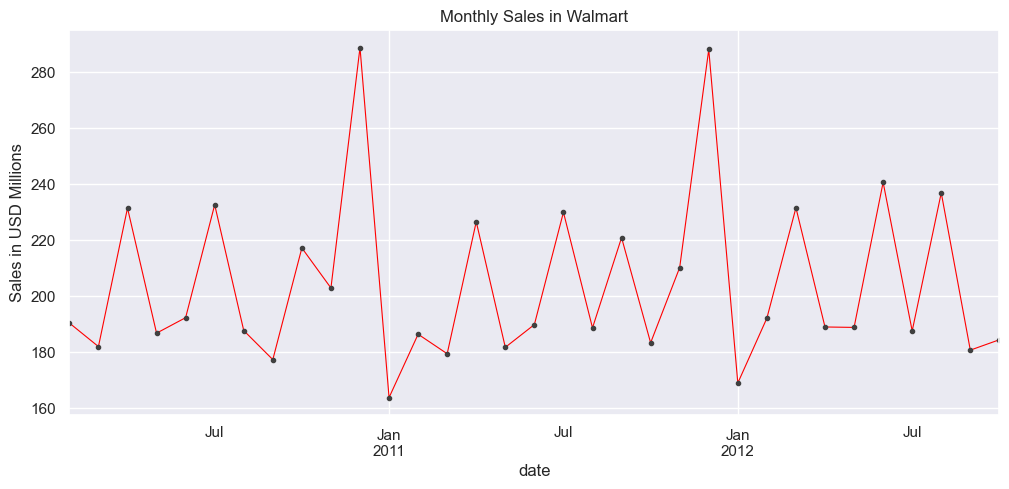

In [23]:
# create lineplot for `weekly_sales`
monthly_sales.plot(
    style='.-', x='date',
    y='monthly_sales', figsize=(12,5),
    color="red", alpha=1,
    linewidth=0.8, markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False)

# add the attributes for chart
plt.title('Monthly Sales in Walmart')
plt.ylabel('Sales in USD Millions')
plt.grid(linewidth=1) 

# show the chart
plt.show()

After aggregation, it can be seen that the graph has a cycle that repeats almost every month.

## Machine Learning for Time Series

Here, we will divide the forcasting into two parts using `weekly` and `monthly` data. The method for creating our model will use the `hybrid` type where the two models are used separately, namely `linear regression` and `xgb regressor`. `Linear regression` is used to extrapolate data to predict `trend`. The difference between the predicted results and the training data will be the `residue`. The `residue` is used by the `xgb regressor` to look for `special patterns`. The predicted results of the `linear regression` and the `xgb regressor` are combined to determine the overall prediction result.

### Weekly Sales Forecasting

In [24]:
# copy dataset
weekly_df = weekly_sales.copy()

# set `date` as index
weekly_df.set_index('date',inplace=True)

#### Linear Regression for Trend Analysis

In [25]:
# set target weekly_sales
y = weekly_df['weekly_sales']

In [26]:
# create timestep as features for machine learning using `Deterministic Process`
dp = DeterministicProcess(
    index=y.index,  # dates from the training data
    constant=True,  # the intercept
    order=1,        # linear trend
    drop=True,      # drop terms to avoid collinearity
)

# create features for the training data
X = dp.in_sample()  

# show the sample features 
X.head()

,const,trend
date,,
2010-02-05,1.0,1.0
2010-02-12,1.0,2.0
2010-02-19,1.0,3.0
2010-02-26,1.0,4.0
2010-03-05,1.0,5.0


Next we will create a new dataset that has no sales, only features to predict sales. Here we take `the next 35 weeks`.

In [27]:
# create future of features for 35 weeks forward
X_future = dp.out_of_sample(35)

# show the sample future of features
X_future.head()

c:\Users\fuada\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



,const,trend
144,1.0,144.0
145,1.0,145.0
146,1.0,146.0
147,1.0,147.0
148,1.0,148.0


In [28]:
# dividing features and target into training and tests using split `train_test_split` 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False,test_size=0.25)

# create the linear regression model
linreg = LinearRegression(fit_intercept=False)

# train the model
linreg.fit(X_train,y_train)

# predict the data
y_fit = pd.Series(linreg.predict(X_train),index=X_train.index)  
y_pred = pd.Series(linreg.predict(X_test),index=X_test.index)

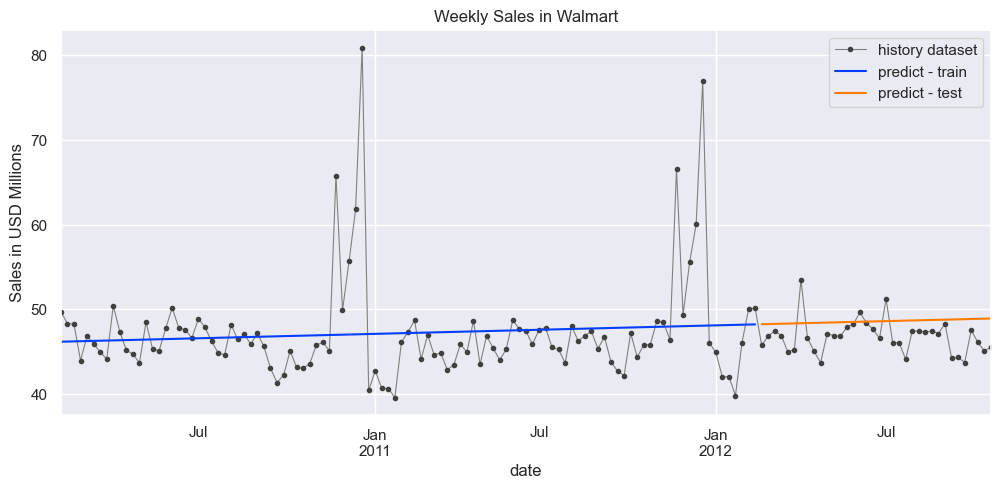

In [29]:
# create subplots
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(12,5))

# plot history data of `weekly_sales`
weekly_sales.plot(
    style='.-',x='date',
    y='weekly_sales',
    color="gray",alpha=1,
    linewidth=0.8, markeredgecolor="0.25",
    markerfacecolor="0.25", ax=axes,
    legend=True, label='history dataset')

# plot predict-train of `weekly_sales`
y_fit.plot(ax=axes,legend=True,label='predict - train')

# plot predict-test of `weekly_sales`
y_pred.plot(ax=axes,legend=True,label='predict - test')

# add the attributes for chart
plt.title('Weekly Sales in Walmart')
plt.ylabel('Sales in USD Millions')
plt.grid(linewidth=1)

# show the chart
plt.show()

You can see that the blue line shows the trend from the training prediction, while the orange line shows the test prediction. From the results of this prediction shows that actually sales `every week` tends to increase.

#### Predict Residual Using XGBoost

In [30]:
# copy dataset
xgb_data = weekly_sales.copy()

# create weekly column in dataset
xgb_data['week'] = xgb_data['date'].dt.isocalendar().week
xgb_data['week'] = xgb_data['week'].astype('int')

In [31]:
# set `week` as feature
X_2 = xgb_data['week']

In [32]:
# set target weekly_sales
y_2 = xgb_data['weekly_sales']

In [33]:
# create future data for 35 weeks forward
future_2 = pd.date_range(start='2012-10-27', end='2013-06-28', freq='W').to_frame()
future_2['week'] = future_2[0].dt.isocalendar().week
future_2['week'] = future_2['week'].astype('int')

# show the sample future data
future_2.head()

,0,week
2012-10-28,2012-10-28,43
2012-11-04,2012-11-04,44
2012-11-11,2012-11-11,45
2012-11-18,2012-11-18,46
2012-11-25,2012-11-25,47


In [34]:
# define features of future data
X_future_2 = future_2['week']

# show the sample features of future data
X_future_2.head().to_frame()

,week
2012-10-28,43
2012-11-04,44
2012-11-11,45
2012-11-18,46
2012-11-25,47


In [35]:
# dividing features and target into training and tests using split `train_test_split` 75% training and 25% test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2,shuffle=False,test_size=0.25)

# calculate the residual target for training XGBoost regressor
y_resid = y_train - y_fit

# train the XGBoost regressor model 
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.03)
xgb.fit(X_train_2, y_resid)

# final result for predict-train and predict-test
y_fit_boosted = xgb.predict(X_train_2) + y_fit
y_pred_boosted = xgb.predict(X_test_2) + y_pred

In [36]:
# create prediction for future (trend + XGBoost)
future_pred = linreg.predict(X_future) + xgb.predict(X_future_2)
future_pred = pd.Series(future_pred,index=future_2.index)

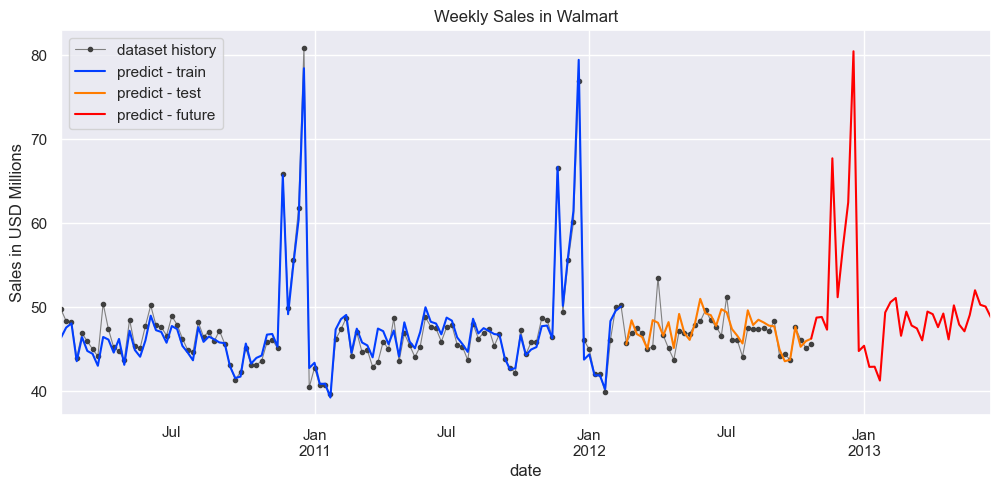

In [37]:
# create subplots
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(12,5))

# plot history data of `weekly_sales`
weekly_sales.plot(
    style='.-', x='date',
    y='weekly_sales',
    color="gray", alpha=1,
    linewidth=0.8, markeredgecolor="0.25",
    markerfacecolor="0.25", ax=axes,
    legend=True, label='dataset history')

# plot predict-train of `weekly_sales`
y_fit_boosted.plot(ax=axes,legend=True,label='predict - train')

# plot predict-test of `weekly_sales`
y_pred_boosted.plot(ax=axes,legend=True,label='predict - test')

# plot predict-future of `weekly_sales`
future_pred.plot(color='red',legend=True,label='predict - future')

# add the attributes for chart
plt.title('Weekly Sales in Walmart')
plt.ylabel('Sales in USD Millions')
plt.grid(linewidth=1)

# show the chart
plt.show()

After combining the `linear regression` and `xgb regressor` models, we can see that predictions for `training` data are represented by `blue`, predictions for `test` data are represented by `orange` while predictions for the `future` are represented by the color `red`. For the original dataset modeled with `dot-line` color `grey`. If we combine the `blue`, `orange` and `red` color lines it will produce a pattern similar to the `original data set` although there are some differences.

#### Calculate Score for MAE, RMSE and R2 Score

In [38]:
# calculate mean absolute error for train and test
mae_train = mean_absolute_error(y_fit_boosted, y_train)
mae_test = mean_absolute_error(y_pred, y_test)

# show the MAE
print('MAE Train -->',round(mae_train,2))
print('MAE Test  -->',round(mae_test,2))

MAE Train --> 0.85
MAE Test  --> 2.28


In [39]:
# calculate root mean square error for train and test
rmse_train = mean_squared_error(y_fit_boosted, y_train)**0.5
rmse_test = mean_squared_error(y_pred, y_test)**0.5

# show the RMSE
print('RMSE Train -->',round(rmse_train,2))
print('RMSE Test  -->',round(rmse_test,2))

RMSE Train --> 1.12
RMSE Test  --> 2.69


In [40]:
# calculate r2_score for train and test
r2_train = r2_score(y_fit_boosted, y_train)
r2_test = r2_score(y_pred, y_test)

# show the R2 Score
print('R2 Score Train -->',round(r2_train,2))
print('R2 Score Test  -->',round(r2_test,2))

R2 Score Train --> 0.97
R2 Score Test  --> -179.83


- From the three quality tests of the `machine learning model` above, it shows that the model gives a very good score for `data training`, this is evidenced by the low scores of `MAE`, `RMSE` and high values of `R2 Score` which are close to `1`.
- For the `test data`, the performance of the `machine learning` model is quite good even though the `MAE` and `RSME` scores are quite high and the `R2 Score` is negative.
- The model is reliable enough to predict the future as shown in the chart above which predicts the next 35 weeks.

### Monthly Sales Forecasting

In [41]:
# copy dataset
monthly_df = monthly_sales.copy()

# set `date` as index
monthly_df.set_index('date',inplace=True)

#### Linear Regression for Trend Analysis

In [42]:
# set target monthly_sales
y = monthly_df['monthly_sales']

In [43]:
# create timestep as features for machine learning using `Deterministic Process`
dp = DeterministicProcess(
    index=y.index,  # dates from the training data
    constant=True,  # the intercept
    order=1,        # quadratic trend
    drop=True,      # drop terms to avoid collinearity
)

# create features for the training data
X = dp.in_sample()  

# show the sample features 
X.head()

,const,trend
date,,
2010-02,1.0,1.0
2010-03,1.0,2.0
2010-04,1.0,3.0
2010-05,1.0,4.0
2010-06,1.0,5.0


Next we will create a new dataset that has no sales, only features to predict sales. Here we take the `next 8 months`.

In [44]:
# create future of features for 8 months forward
X_future = dp.out_of_sample(8)

# show the sample future of features
X_future.head()

,const,trend
2012-11,1.0,34.0
2012-12,1.0,35.0
2013-01,1.0,36.0
2013-02,1.0,37.0
2013-03,1.0,38.0


In [45]:
# dividing features and target into training and tests using split `train_test_split` 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.25)

# create the linear regression model
linreg = LinearRegression(fit_intercept=False)

# train the model
linreg.fit(X_train,y_train)

# predict the data
y_fit = pd.Series(linreg.predict(X_train),index=X_train.index)  
y_pred = pd.Series(linreg.predict(X_test),index=X_test.index)

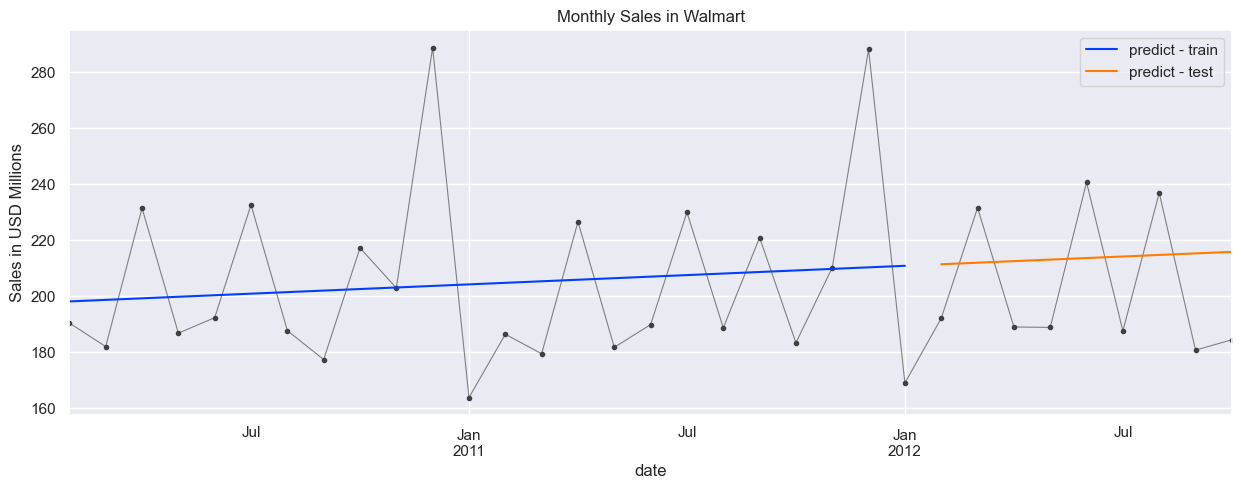

In [46]:
# create subplots
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(15,5))

# plot history data of `monthly_sales`
monthly_sales.plot(
    style='.-', x='date',
    y='monthly_sales',
    color="gray", alpha=1,
    linewidth=0.8, markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,ax=axes)

# plot predict-train of `monthly_sales`
y_fit.plot(ax=axes,legend=True,label='predict - train')

# plot predict-test of `monthly_sales`
y_pred.plot(ax=axes,legend=True,label='predict - test')

# add the attributes for chart
plt.title('Monthly Sales in Walmart')
plt.ylabel('Sales in USD Millions')
plt.grid(linewidth=1)

# show the chart
plt.show()

You can see that the blue line shows the trend from the training prediction, while the orange line shows the test prediction. From the results of this prediction shows that the actual sales of `every month` tends to increase.

#### Predict Residual Using XGBoost

In [47]:
# copy dataset
xgb_data = monthly_sales.copy()

# create monthly column in dataset
xgb_data['month'] = xgb_data['date'].dt.month
xgb_data['month'] = xgb_data['month'].astype('int')

In [48]:
# set `month` as feature
X_2 = xgb_data['month']

In [49]:
# set target monthly_sales
y_2 = xgb_data['monthly_sales']

In [50]:
# create future data for 8 months forward
future_2 = pd.date_range(start='2012-10', end='2013-06', freq='M').to_frame()
future_2['month'] = future_2[0].dt.month
future_2['month'] = future_2['month'].astype('int')

# show the sample future data
future_2.head()

,0,month
2012-10-31,2012-10-31,10
2012-11-30,2012-11-30,11
2012-12-31,2012-12-31,12
2013-01-31,2013-01-31,1
2013-02-28,2013-02-28,2


In [51]:
# define features of future data
X_future_2 = future_2['month']

# show the sample features of future data
X_future_2.head().to_frame()

,month
2012-10-31,10
2012-11-30,11
2012-12-31,12
2013-01-31,1
2013-02-28,2


In [52]:
# dividing features and target into training and tests using split `train_test_split` 75% training and 25% test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2,shuffle=False,test_size=0.25)

# calculate the residual target for training XGBoost regressor
y_resid = y_train - y_fit

# train the XGBoost regressor model 
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.03)
xgb.fit(X_train_2, y_resid)

# final result for predict-train and predict-test
y_fit_boosted = xgb.predict(X_train_2) + y_fit
y_pred_boosted = xgb.predict(X_test_2) + y_pred

In [53]:
# create prediction for future (trend + XGBoost)
future_pred = linreg.predict(X_future) + xgb.predict(X_future_2)
future_pred = pd.Series(future_pred,index=future_2.index)

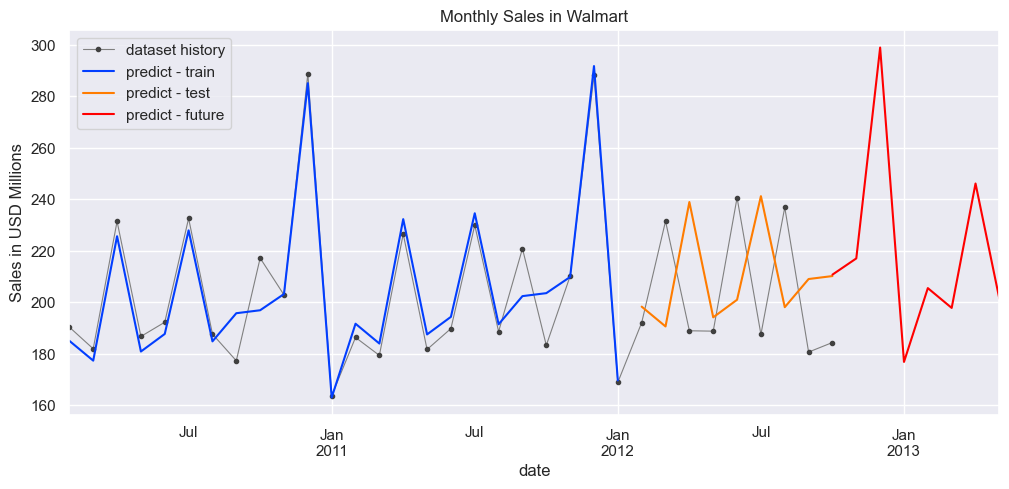

In [54]:
# create subplots
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(12,5))

# plot history data of `monthly_sales`
monthly_sales.plot(
    style='.-', x='date',
    y='monthly_sales',
    color="gray", alpha=1,
    linewidth=0.8, markeredgecolor="0.25",
    markerfacecolor="0.25", ax=axes,
    legend=True, label='dataset history')

# plot predict-train of `monthly_sales`
y_fit_boosted.plot(ax=axes,legend=True,label='predict - train')

# plot predict-test of `monthly_sales`
y_pred_boosted.plot(ax=axes,legend=True,label='predict - test')

# plot predict-future of `monthly_sales`
future_pred.plot(color='red',legend=True,label='predict - future')

# add the attributes for chart
plt.title('Monthly Sales in Walmart')
plt.ylabel('Sales in USD Millions')
plt.grid(linewidth=1)

# show the chart
plt.show()

- After combining the `linear regression` and `xgb regressor` models we can see that predictions for `training` data are represented by `blue`, predictions for `test` data are represented by `orange` while predictions for the `future` are represented by the color `red`. For the original dataset modeled with `dot-line` color `grey`. If we combine the `blue`, `orange` and `red` color lines it will produce a pattern that is quite similar to the `original data set` although there are some differences.
- It turns out that the model works better using a `weekly sales dataset` compared to using a `monthly sales dataset` just looking at the predicted lines.

#### Calculate Score for MAE, RMSE and R2 Score

In [55]:
# calculate mean absolute error for train and test
mae_train = mean_absolute_error(y_fit_boosted, y_train)
mae_test = mean_absolute_error(y_pred, y_test)

# show the MAE
print('MAE Train -->',round(mae_train,2))
print('MAE Test  -->',round(mae_test,2))

MAE Train --> 6.42
MAE Test  --> 25.38


In [56]:
# calculate root mean square error for train and test
rmse_train = mean_squared_error(y_fit_boosted, y_train)**0.5
rmse_test = mean_squared_error(y_pred, y_test)**0.5

# show the RMSE
print('RMSE Train -->',round(rmse_train,2))
print('RMSE Test  -->',round(rmse_test,2))

RMSE Train --> 8.82
RMSE Test  --> 25.84


In [57]:
# calculate r2_score for train and test
r2_train = r2_score(y_fit_boosted, y_train)
r2_test = r2_score(y_pred, y_test)

# show the R2 Score
print('R2 Score Train -->',round(r2_train,2))
print('R2 Score Test  -->',round(r2_test,2))

R2 Score Train --> 0.92
R2 Score Test  --> -326.02


- From the three quality tests of the `machine learning model` above, it shows that the score from the `monthly sales dataset` gives worse results than using the `weekly sales dataset` as evidenced by an increase in the scores of `MAE` and `RMSE`.
- For the `R2 Score` for `monthly sales dataset` has a lower value compared to using `weekly sales dataset`. But the `R2 Score` for `data training` is still better than the `R2 Score` for `data test`.

# General Conclusion

From the discussion above, we can draw the following conclusions:
- The sales cycle repeats regularly when towards the end of the year there is a significant high weekly sales spike. The graphs from `2010` to `2012` have almost the same annual pattern.
- Historical highest weekly sales of `80 Million USD`.
- Weekly sales performance shows that `Holiday` has a higher sales impact compared to `Not Holiday`.
- The relationship between `weekly sales` and `temperature` shows that when `temperature increases`, `sales decrease`.
- Changes in `fuel prices` from `2.5 USD` to `4.5 USD`, did not have a significant effect on `sales`.
- `CPI` shows increase over time. `CPI` has little effect on `sales`.
- The `unemployment rate` shows a weak correlation between `weekly sales` and `unemployment rate` and shows a downward trend.
- `Shop 19`, `Shop 3` and `Shop 13` provided the highest sales in history, while the stores with the lowest sales were `Shop 4`, `Shop 43` and `Shop 32`.
- `Model Machine Learning` with `hybrid` technique which combines `linear regression` and `xgb regressor` models is reliable enough to predict sales in `Walmart`.
- `Weekly sales dataset` gives much better test score results than using `Monthly sales dataset` due to the larger number of datasets.
- `Model Machine Learning` provides good predictive results for `dataset training` compared to `dataset test`, this can be proven by testing the `MAE` and `RMSE` scores.